### INTRO

In this Notebook you will find a simple web scraping project using Pandas. Pandas webscraping is an effective and fast 
to scrape data from the web (especially tables) that many people are not aware of.
this is a short Notebook - Enjoy ! Please iplot visible 

In [19]:
import pandas as pd
%pylab inline
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/JB/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [20]:
url='https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

In [21]:
df=pd.read_html(url)
df 

[      Rk                    Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
 0      1              Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...   
 1      2               Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...   
 2      3         LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...   
 3      4            Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  ...   
 4      5  Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  ...   
 ..   ...                       ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
 672  525                Trae Young  PG  21  ATL  60  60  35.3  9.1  20.8  ...   
 673  526               Cody Zeller   C  27  CHO  58  39  23.1  4.3   8.3  ...   
 674  527              Tyler Zeller   C  30  SAS   2   0   2.0  0.5   2.0  ...   
 675  528                Ante Žižić   C  23  CLE  22   0  10.0  1.9   3.3  ...   
 676  529               Ivica Zubac   C  22  LAC  72  70  18.4  3.3   5.3  ...   
 
       FT%  OR

In [22]:
type(df) # the print function shows df is actually a list. Please read more on read_html

list

In [23]:
df[0].head(3) # Looking at the first 3 rows

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9


In [24]:
years=[2015,2016,2017,2018,2019,2020]

url='https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'
 
urls=[url.format(i) for i in years]

In [25]:
dfs=[pd.read_html(i) for i in urls]

In [26]:
dfs[5][0][:5] # Loking the 

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [27]:
df2015=dfs[0][0]
df2016=dfs[1][0]
df2017=dfs[2][0]
df2018=dfs[3][0]
df2019=dfs[4][0]
df2020=dfs[5][0]

In [83]:
class CurrentState:
    def __init__(self,df,year):
        self.df=df
        self.year=year
        self.df=self.df[~self.df['Rk'].str.contains('Rk')]
        
    def info(self):
        print (self.df.info())
        
    def view(self,nrow: int):
        print (self.df.head(nrow))
             
        
    def showstate(self):
        print('This is the current average of a league in {}:\n'.format(self.year))
        
        print (pd.DataFrame(self.df[['Age', 'MP', 'FG%','3P%', 'FT%','TRB'
        , 'AST', 'STL', 'BLK', 'PTS']].apply(pd.to_numeric,errors='coerce').mean().round(3)).T)
        
    def top_performers(self, n: int, col):
        """method allowing to see the top performers. Choose n performers and an aptitude"""
        
        self.df[col]=self.df[col].astype(float, errors='ignore')
        
        # Use this plot if you could use iplot (This is an interact plot)  
        #self.df[['Player',col]].nlargest(n,col).set_index('Player').iplot(kind='bar')
        plt.figure(figsize=(12,6))
        sns.barplot(x='Player', y=col, data=self.df[['Player',col]].nlargest(n,col)[['Player', col]])
        
        

In [36]:
CurrentState(df2019, 2019).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      708 non-null    object
 1   Player  708 non-null    object
 2   Pos     708 non-null    object
 3   Age     708 non-null    object
 4   Tm      708 non-null    object
 5   G       708 non-null    object
 6   GS      708 non-null    object
 7   MP      708 non-null    object
 8   FG      708 non-null    object
 9   FGA     708 non-null    object
 10  FG%     702 non-null    object
 11  3P      708 non-null    object
 12  3PA     708 non-null    object
 13  3P%     661 non-null    object
 14  2P      708 non-null    object
 15  2PA     708 non-null    object
 16  2P%     693 non-null    object
 17  eFG%    702 non-null    object
 18  FT      708 non-null    object
 19  FTA     708 non-null    object
 20  FT%     665 non-null    object
 21  ORB     708 non-null    object
 22  DRB     708 non-null    ob

In [37]:
CurrentState(df2020, 2020).showstate()

This is the current average of a league in 2020:

      Age     MP    FG%    3P%    FT%    TRB    AST    STL    BLK    PTS
0  25.763  19.18  0.443  0.313  0.744  3.563  1.844  0.618  0.398  8.461


In [42]:
CurrentState(df2020,2020).view(3)

  Rk             Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  ORB  \
0  1       Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...  .582  3.3   
1  2        Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...  .691  2.4   
2  3  LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...  .827  1.9   

   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  

[3 rows x 30 columns]


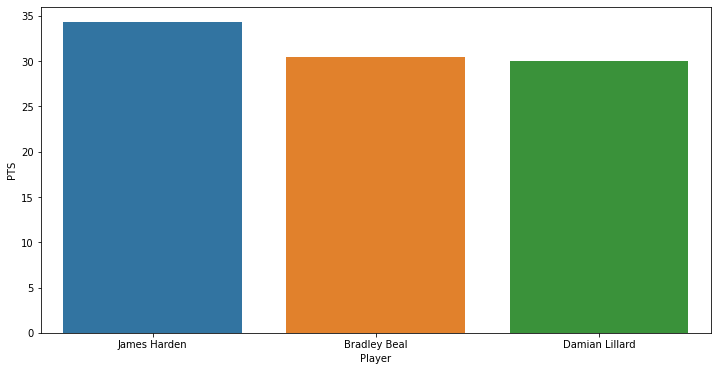

In [84]:
CurrentState(df2020, 2020).top_performers(3,'PTS')

 I wanted to do slightly more but this is just a demo. There is aonther webscraping file for you :) 